# 矩阵运算

In [1]:
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from scipy.stats import gamma

## 单位矩阵

In [2]:
# def eye(num_rows: Any,
#         num_columns: Any = None,
#         batch_shape: Any = None,
#         dtype: DType = dtypes.float32,
#         name: Any = None) -> object
mt_001 = tf.eye(3, 3, dtype=tf.int32)
print('mt_001 = ', mt_001, '\n')

mt_001 =  tf.Tensor(
[[1 0 0]
 [0 1 0]
 [0 0 1]], shape=(3, 3), dtype=int32) 



## 全零矩阵

In [3]:
# def zeros(shape: {_shape_tuple},
#           dtype: DType = dtypes.float32,
#           name: Any = None) -> Union[object, Tensor]
mt_002 = tf.zeros((3, 3), dtype=tf.int32)
print('mt_002 = ', mt_002, '\n')

mt_002 =  tf.Tensor(
[[0 0 0]
 [0 0 0]
 [0 0 0]], shape=(3, 3), dtype=int32) 



## 按照模板创建全零矩阵

模板可以是: `数组`, `numpy数组`, `tf.constant`对象

In [4]:
# def zeros_like(input: {shape, dtype},
#                   dtype: Any = None,
#                   name: Any = None) -> Union[object, Tensor]
numpy_template = np.array([[1, 2, 3], [11, 22, 33]])
mt_002_clone_shape = tf.zeros_like(numpy_template, dtype=tf.float32)
print('mt_002_clone_shape = ', mt_002_clone_shape)

mt_002_clone_shape =  tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)


shape保持不变

In [5]:
assert numpy_template.shape == mt_002_clone_shape.shape

## 全1矩阵

In [6]:
# def ones(shape: {_shape_tuple},
#          dtype: DType = dtypes.float32,
#          name: Any = None) -> Union[object, Tensor]
mt_003 = tf.ones((3, 3), dtype=tf.int32)
print('mt_003 = ', mt_003, '\n')

mt_003 =  tf.Tensor(
[[1 1 1]
 [1 1 1]
 [1 1 1]], shape=(3, 3), dtype=int32) 



按照模板创建全1矩阵，与`zeros_like()`函数类似

In [7]:
const_template = tf.constant([[21], [22], [33]], dtype=tf.float32)
mt_003_clone_shape = tf.zeros_like(const_template, dtype=tf.int16)
print('mt_003_clone_shape = ', mt_003_clone_shape, '\n')

mt_003_clone_shape =  tf.Tensor(
[[0]
 [0]
 [0]], shape=(3, 1), dtype=int16) 



shape保持不变

In [8]:
assert const_template.shape == mt_003_clone_shape.shape

dtype被重新设置

In [9]:
assert const_template.dtype != mt_003_clone_shape.dtype

## 从`服从指定均匀分布的序列`中随机取出指定个数的值。

`均匀分布`是指，二维空间中, x = minval and x = maxval 的一条直线

In [10]:
# 函数原型
# def random_uniform(shape: Any,
#                    minval: int = 0,
#                    maxval: Optional[{__eq__}] = None,
#                    dtype: DType = dtypes.float32,
#                    seed: Any = None,
#                    name: Any = None) -> object
# shape – A 1-D integer Tensor or Python array. The shape of the output tensor.
rnd = tf.random.uniform([1, 2], minval=1, maxval=5, dtype=tf.float32)
print('uniform = ', rnd, '\n')

uniform =  tf.Tensor([[3.9925966 2.2832737]], shape=(1, 2), dtype=float32) 



## 从`服从指定正态分布的序列`中随机取出指定个数的值

In [11]:
# 函数原型
# def random_normal(shape: Any,
#                   mean: float = 0.0,
#                   stddev: float = 1.0,
#                   dtype: DType = dtypes.float32,
#                   seed: Any = None,
#                   name: Any = None) -> object
# shape – A 1-D integer Tensor or Python array. The shape of the output tensor.
rnd = tf.random.normal([12], mean=0, stddev=1, dtype=tf.float32)
print('normal = ', rnd, '\n')

normal =  tf.Tensor(
[ 0.25958237  0.36905584 -1.2463893   1.187106   -0.5751834  -0.73985445
 -0.3614732  -0.28265375 -0.3164267   0.23222785 -0.23913758 -1.1220918 ], shape=(12,), dtype=float32) 



## 从`服从指定泊松分布的序列`中随机取出指定个数的值。

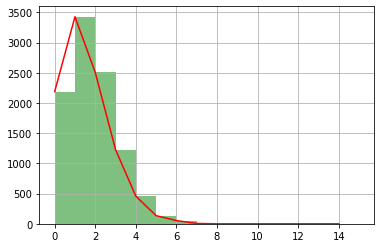

In [12]:
# Poisson分布
x = np.random.poisson(lam=1.5, size=10000)
pillar = 15
a = plt.hist(x, bins=pillar, range=[0, pillar], color='g', alpha=0.5)
plt.plot(a[1][0:pillar], a[0], 'r')
plt.grid()
plt.show()

函数原型
```python
def random_poisson_v2(shape: Any,
                      lam: Any,
                      dtype: DType = dtypes.float32,
                      seed: Any = None,
                      name: Any = None) -> Any
```
shape – A 1-D integer Tensor or Python array.
        The shape of the output samples to be drawn per "rate"-parameterized distribution.
        **注意** 这里的shape还有一个隐藏的纬度，这个纬度的大小是根据参数`lam`的维度来确定的

lam - A Tensor or Python value or N-D array of type dtype.
      lam provides the rate parameter(s) describing the poisson distribution(s) to sample.
      对于`lam`的理解:就是设置一组λ(例如 [0.5, 1.5]), 然后生成满足泊松分布的随机数，有几个λ就生成几组。生成的结果与shape的最后一维
      融合。

In [13]:
rnd = tf.random.poisson([10], [0.5, 1.5], dtype=tf.float32)
print('poisson1 = ', rnd, '\n')
print('poisson1 shape = ', rnd.shape, '\n')

poisson1 =  tf.Tensor(
[[0. 1.]
 [0. 2.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 2.]
 [2. 2.]
 [1. 1.]
 [0. 1.]
 [1. 2.]], shape=(10, 2), dtype=float32) 

poisson1 shape =  (10, 2) 



In [14]:
rnd = tf.random.poisson([5, 7], [0.5, 1.5, 5.5], dtype=tf.float32)
print('poisson2 = ', rnd, '\n')
print('poisson2 shape = ', rnd.shape, '\n')

poisson2 =  tf.Tensor(
[[[ 0.  2.  5.]
  [ 0.  1.  6.]
  [ 0.  4.  4.]
  [ 0.  1.  4.]
  [ 0.  2.  9.]
  [ 0.  3.  5.]
  [ 0.  0.  6.]]

 [[ 0.  1.  7.]
  [ 0.  0.  7.]
  [ 1.  0.  2.]
  [ 1.  1.  5.]
  [ 0.  0.  4.]
  [ 1.  1.  6.]
  [ 0.  1.  4.]]

 [[ 0.  0.  7.]
  [ 2.  2.  9.]
  [ 0.  1.  1.]
  [ 2.  2.  7.]
  [ 1.  2. 11.]
  [ 1.  3.  0.]
  [ 0.  1. 14.]]

 [[ 0.  0.  8.]
  [ 0.  4.  6.]
  [ 0.  1.  6.]
  [ 0.  1.  7.]
  [ 1.  3.  7.]
  [ 0.  0. 11.]
  [ 1.  2.  7.]]

 [[ 1.  2.  6.]
  [ 0.  3.  5.]
  [ 1.  2.  6.]
  [ 1.  0.  4.]
  [ 0.  2.  4.]
  [ 1.  1.  6.]
  [ 0.  1.  5.]]], shape=(5, 7, 3), dtype=float32) 

poisson2 shape =  (5, 7, 3) 



## 分类采样

函数原型
```python
def categorical(logits: Any,
                num_samples: Any,
                dtype: Any = None,
                seed: Any = None,
                name: Any = None) -> object
```
logits - 2-D Tensor with shape [batch_size, num_classes]. Each slice [i, :] represents the unnormalized
         log-probabilities for all classes.

num_samples - 0-D. Number of independent samples to draw for each row slice.

Return - The drawn samples of shape [batch_size, num_samples].

**理解** 给一个`batch_size` * `num_classes`的方阵，`batch_size`表示采样次数，`num_classes`表示每一个类别在每一个`batch`中被抽取的概率。`num_samples`表示每一个`batch`抽取样本的数量。

`返回值`是`batch_size` * `num_samples`的方阵，里面的数字不是样本本身，类别的下标

均匀抽取

In [15]:
num_samples = 5

logits = tf.math.log([[0.2, 0.2, 0.2, 0.2, 0.2],
                     [1., 1., 1., 1., 1.]])
cat = tf.random.categorical(logits, num_samples)
print('logits shape = ', logits.shape, '\n')
print('cat1 = ', cat, '\n')

logits shape =  (2, 5) 

cat1 =  tf.Tensor(
[[0 2 3 3 4]
 [4 2 0 4 3]], shape=(2, 5), dtype=int64) 



<br/>batch 0 倾向于样本4, batch 1 倾向于样本0

In [16]:
logits = tf.math.log([[0.1, 0.1, 0.1, 0.1, 1.],
                     [1., 0.1, 0.1, 0.1, 0.1]])
cat = tf.random.categorical(logits, num_samples)
print('cat2 = ', cat, '\n')

cat2 =  tf.Tensor(
[[4 4 4 4 4]
 [3 0 0 0 0]], shape=(2, 5), dtype=int64) 



## 从"服从指定gamma分布的序列"中随机取出指定个数的值

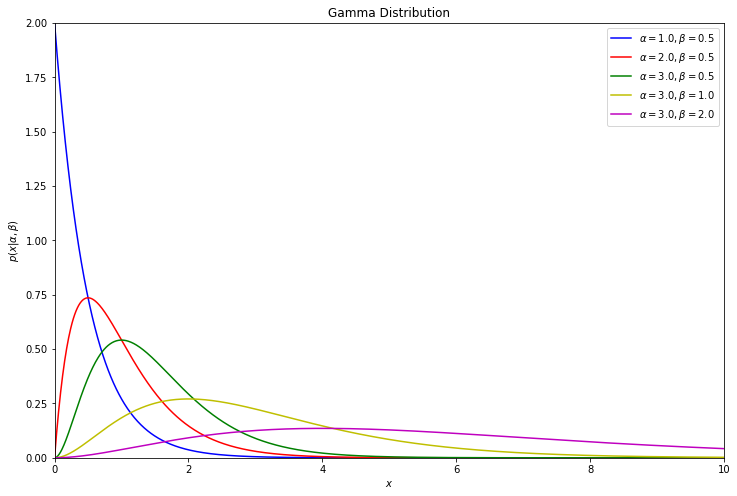

In [17]:
# Gamma分布（Gamma Distribution）
alpha_values = [1, 2, 3, 3, 3]
beta_values = [0.5, 0.5, 0.5, 1, 2]
color = ['b', 'r', 'g', 'y', 'm']
x = np.linspace(1E-6, 10, 1000)

fig, ax = plt.subplots(figsize=(12, 8))

for k, t, c in zip(alpha_values, beta_values, color):
    dist = gamma(k, 0, t)
    plt.plot(x, dist.pdf(x), c=c, label=r'$\alpha=%.1f,\beta=%.1f$' % (k, t))

plt.xlim(0, 10)
plt.ylim(0, 2)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title('Gamma Distribution')

plt.legend(loc=0)
plt.show()

函数原型
```python
def random_gamma(shape: Any,
                 alpha: Any,
                 beta: Any = None,
                 dtype: DType = dtypes.float32,
                 seed: Any = None,
                 name: Any = None) -> Any
```

shape - A 1-D integer Tensor or Python array. The shape of the output samples to be drawn per
        alpha/beta-parameterized distribution.
        **注意** 这里的shape还有两个隐藏的纬度，这个纬度的大小是根据参数`alpha`和`beta`的维度来确定的

alpha - A Tensor or Python value or N-D array of type dtype. alpha provides the shape parameter(s) describing
        the gamma distribution(s) to sample. Must be broadcastable with beta.

beta - A Tensor or Python value or N-D array of type dtype. Defaults to 1. beta provides the inverse scale
       parameter(s) of the gamma distribution(s) to sample. Must be broadcastable with alpha.

In [18]:
gm = tf.random.gamma([5], [0.5, 1.5])
print('gm1 = ', gm, '\n')
print('gm1 shape = ', gm.shape, '\n')

gm1 =  tf.Tensor(
[[2.9402344e+00 1.4568458e+00]
 [8.7305978e-03 1.0094446e+00]
 [1.6769568e-03 4.8147001e+00]
 [1.5329680e-01 1.1285794e-01]
 [8.2265876e-02 1.0546547e+00]], shape=(5, 2), dtype=float32) 

gm1 shape =  (5, 2) 



In [19]:
# alpha + beta
alpha = tf.constant([[1.], [3.], [5.]])
beta = tf.constant([[3., 4.]])
gm = tf.random.gamma([5], alpha=alpha, beta=beta)
# samples has shape [5, 3, 2], with 5 samples each of 3x2 distributions.
print('gm2 = ', gm, '\n')

gm2 =  tf.Tensor(
[[[0.7462594  0.1289993 ]
  [0.71799064 0.91600144]
  [1.4739667  0.679698  ]]

 [[1.1179643  0.01385136]
  [0.55209225 0.54105586]
  [0.9448002  1.9170761 ]]

 [[0.3174745  0.05332041]
  [0.3999418  0.6673344 ]
  [0.48124477 1.1448811 ]]

 [[0.3166509  0.10174306]
  [0.91888684 0.17174503]
  [4.5491624  1.7886275 ]]

 [[0.2993024  0.04959896]
  [0.65825367 0.5095716 ]
  [0.6526775  1.8253863 ]]], shape=(5, 3, 2), dtype=float32) 



## 模拟线性代数

复现一下经典的函数

$ Y = X * W + b $

In [20]:
# 样本数量
n = 100

In [21]:
# 生成测试用数据集
X = tf.random.uniform([n, 2], minval=-10, maxval=10)
w0 = tf.constant([[1.0], [2.0]])
b0 = tf.constant(3.0)

In [22]:
# 矩阵乘法,增加正态扰动
Y = tf.matmul(X, w0) + b0 + tf.random.normal([n, 1], mean=0.0, stddev=2.0, dtype=tf.float32)

In [23]:
# 初始化权重为正态分布
w = tf.Variable(tf.random.normal(w0.shape, mean=0.0, stddev=1.0, dtype=tf.float32))
# 初始化噪声=0
b = tf.Variable(0.0)
# 训练次数
epoches = 5000
# learn rate
learn_rate = 0.001

In [24]:
for epoch in tf.range(1, epoches + 1):
    # eager model
    with tf.GradientTape() as tape:
        # 正向传播求损失
        Y_hat = tf.matmul(X, w) + b
        loss = tf.squeeze(tf.matmul(tf.transpose(Y - Y_hat), (Y - Y_hat))) / (2.0 * n)

    # 反向传播求梯度
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
    # 梯度下降法更新参数
    w.assign_sub(learn_rate * dloss_dw)
    b.assign_sub(learn_rate * dloss_db)

    if epoch % 1000 == 0:
        tf.print("epoch =", epoch, " loss =", loss, )
        tf.print("w =", w)
        tf.print("b =", b)
        tf.print("")

epoch = 1000  loss = 2.33518291
w = [[0.979657114]
 [1.99867642]]
b = 1.87958014

epoch = 2000  loss = 1.82038879
w = [[0.976173282]
 [1.99284101]]
b = 2.56893754

epoch = 3000  loss = 1.75036764
w = [[0.974888206]
 [1.99068868]]
b = 2.82317591

epoch = 4000  loss = 1.74084377
w = [[0.97441411]
 [1.98989642]]
b = 2.91693926

epoch = 5000  loss = 1.73954821
w = [[0.974239051]
 [1.98960257]]
b = 2.9515214

